Kyle Shannon - 22 NOV 2015 - I decided to use the 2<sup>nd</sup> version dataset [with extra data points and variables] to complete this project.

### Section 0: References 
At End of Document

### Section 1: Statistical Test

#### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

There is a statistically significant difference in NYC Subway ridership during rainy and non rainy days. Formally:

-  H<sub>0</sub>: &mu;<sub>nonRainy</sub> = &mu;<sub>Rainy</sub> 
-  H<sub>a</sub>: &mu;<sub>nonRainy</sub> &#8800; &mu;<sub>Rainy</sub> 


Day | &mu; | Refers to 
--- | ---
nonRainy | 1845.539 | Data from Figure 1
Rainy | 2028.196 | Data from Figure 2

The null hypothesis states that there is no mean significant change in subway ridership between rainy and non rainy days. The alternative hypothesis states that there is a statistically significant difference in means. Therefore this will be a *two tailed test*. 

<img src="Figure 1.png" alt="inline" style="width: 400px; float:left;"/><img src="Figure 2.png" alt="inline" style="width: 380px; float:left;"/>

<img src="Figure 3.png" alt="inline" style="width: 400px; float:left;"/><img src="Figure 4.png" alt="inline" style="width: 380px; float:left;"/>

#### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

Because the distributions in Both Figure 1 and 2 are not normal but rather right-tailed skewed it may not be best to use a t-test. Instead the Mann-Whitney U test will be used.

#### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

- nonRainy &mu; = 1845.539
- Rainy &mu; = 2028.196
- Mann-Whitney Test Statistic:  153635120.5
- p value:  5.48213914249e-06

#### 1.4 What is the significance and interpretation of these results?

With such a low p-value the null hypothsis is rejected in favor of the alternative. In other words we conclude with 95% confidence that the difference in distributions is not due to random sampiling, rather the sample sets come from two distinct populations. 

### Section 2: Linear Regression

#### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:

I used OLS Linear Regression to compute the &beta; coefficenets. I performed the final regression in ScikitLearn, however I used StatsModels to explore using different features. I largely did this because of how easy it is to get t-statistics, p-values and AIC from the regression_results.summary() method. 

#### 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

#### 2.3 Why did you select these features in your model?

#### 2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

#### 2.5 What is your model’s R<sup>2</sup> (coefficients of determination) value?

#### 2.6 What does this R<sup>2</sup> value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R<sup>2</sup> value?

### Section 3: Visualization

### Relevant Code:

In [60]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import sklearn
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import formatter
import math
import statsmodels.formula.api as smf



In [5]:
df = pd.read_csv('turnstile_weather_v2.csv') #import csv into pandas.dataframe

In [6]:
df.info() #gathering general info about data, including counts, dtypes(), nulls, and col names.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42649 entries, 0 to 42648
Data columns (total 27 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

In [7]:
df.describe() #gathering general statistical info about data.

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [8]:
print df['rain'].value_counts() #using value_counts to glean more info about particular columns of data.

0    33064
1     9585
Name: rain, dtype: int64


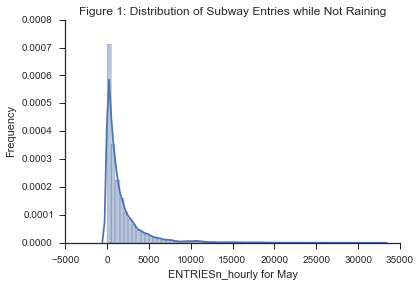

In [9]:
#Figure 1
sns.set_style("ticks")
figure_1 = sns.distplot(df['ENTRIESn_hourly'][df['rain']==0], bins=range(0,30001,500))
figure_1.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', yticks=np.arange(0.0000,0.0009,0.0001), 
             title="Figure 1: Distribution of Subway Entries while Not Raining")
sns.despine()
plt.show()

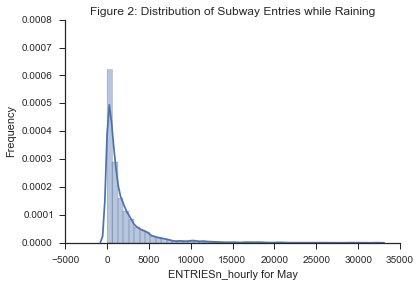

In [10]:
#Figure 2
sns.set_style("ticks")
figure_2 = sns.distplot(df['ENTRIESn_hourly'][df['rain']==1])
figure_2.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', yticks=np.arange(0.0000,0.0009,0.0001),
             title="Figure 2: Distribution of Subway Entries while Raining")
sns.despine()
plt.show()

In [11]:
print 'Non Rainy Days: '
print df['ENTRIESn_hourly'][df['rain']==0].describe()

Non Rainy Days: 
count    33064.000000
mean      1845.539439
std       2878.770848
min          0.000000
25%        269.000000
50%        893.000000
75%       2197.000000
max      32814.000000
Name: ENTRIESn_hourly, dtype: float64


In [12]:
print 'Rainy Days: '
print df['ENTRIESn_hourly'][df['rain']==1].describe()

Rainy Days: 
count     9585.000000
mean      2028.196035
std       3189.433373
min          0.000000
25%        295.000000
50%        939.000000
75%       2424.000000
max      32289.000000
Name: ENTRIESn_hourly, dtype: float64


In [13]:
#MannWhitney U test
non_rainy = df['ENTRIESn_hourly'][df['rain']==0]
rainy = df['ENTRIESn_hourly'][df['rain']==1]
statistic, pvalue = scipy.stats.mannwhitneyu(non_rainy, rainy)
print 'Test Statistic: ', statistic
print 'p-value: ', pvalue*2 #pvalue*2 for 2 sided test.

Test Statistic:  153635120.5
p-value:  5.48213914249e-06


In [14]:
x = df['ENTRIESn_hourly'][df['rain']==0]
y = df['ENTRIESn_hourly'][df['rain']==1]
m_u = len(x)*len(y)/2

sigma_u = np.sqrt(len(x)*len(y)*(len(x)+len(y)+1)/12)

z = (u - m_u)/sigma_u

print z

NameError: name 'u' is not defined

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


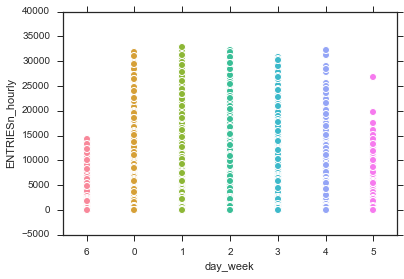

In [15]:
sns.stripplot(x="day_week", y="ENTRIESn_hourly", data=df)

In [16]:
#Shapiro test not good for large sample size. Perhaps we can randomly sub sample and rerun, or use the darling test?
scipy.stats.shapiro(df['ENTRIESn_hourly'][df['rain']==1])

/Applications/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:1082: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.5938820838928223, 0.0)

In [17]:
df['ENTRIESn_hourly_logtran'] = df['ENTRIESn_hourly']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42649 entries, 0 to 42648
Data columns (total 28 columns):
UNIT                       42649 non-null object
DATEn                      42649 non-null object
TIMEn                      42649 non-null object
ENTRIESn                   42649 non-null int64
EXITSn                     42649 non-null int64
ENTRIESn_hourly            42649 non-null float64
EXITSn_hourly              42649 non-null float64
datetime                   42649 non-null object
hour                       42649 non-null int64
day_week                   42649 non-null int64
weekday                    42649 non-null int64
station                    42649 non-null object
latitude                   42649 non-null float64
longitude                  42649 non-null float64
conds                      42649 non-null object
fog                        42649 non-null int64
precipi                    42649 non-null float64
pressurei                  42649 non-null float64
rain     

In [19]:
df['ENTRIESn_hourly_logtran'] = np.log(df['ENTRIESn_hourly_logtran'])

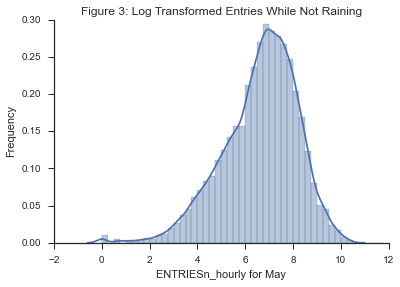

In [20]:
sns.set_style("ticks")
figure_1 = sns.distplot(df['ENTRIESn_hourly_logtran'][df['rain']==0], bins=np.arange(0,12,.25))
figure_1.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', title="Figure 3: Log Transformed Entries While Not Raining")
sns.despine()
plt.show()

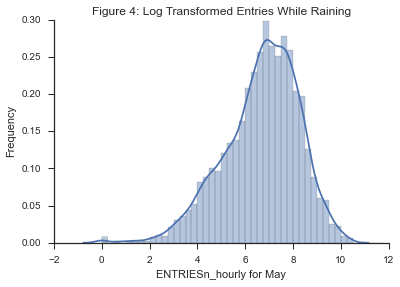

In [21]:
sns.set_style("ticks")
figure_1 = sns.distplot(df['ENTRIESn_hourly_logtran'][df['rain']==1], bins=np.arange(0,12,.25))
figure_1.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', title="Figure 4: Log Transformed Entries While Raining")
sns.despine()
plt.show()

In [22]:
scipy.stats.mannwhitneyu(df['ENTRIESn_hourly_logtran'][df['rain']==0],df['ENTRIESn_hourly_logtran'][df['rain']==1])

MannwhitneyuResult(statistic=153635120.5, pvalue=2.7410695712437496e-06)

In [23]:
statsmodels.stats.weightstats.ttest_ind(df['ENTRIESn_hourly_logtran'][df['rain']==0],df['ENTRIESn_hourly_logtran'][df['rain']==1])

AttributeError: 'module' object has no attribute 'stats'

In [ ]:
df['ENTRIESn_hourly_logtran'].describe()

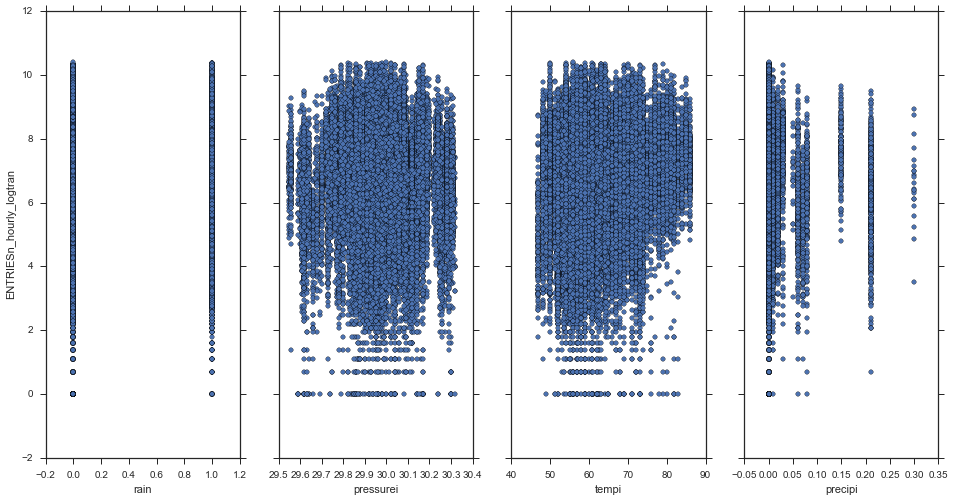

In [25]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='rain', y='ENTRIESn_hourly_logtran', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='pressurei', y='ENTRIESn_hourly_logtran', ax=axs[1])
df.plot(kind='scatter', x='tempi', y='ENTRIESn_hourly_logtran', ax=axs[2])
df.plot(kind='scatter', x='precipi', y='ENTRIESn_hourly_logtran', ax=axs[3])

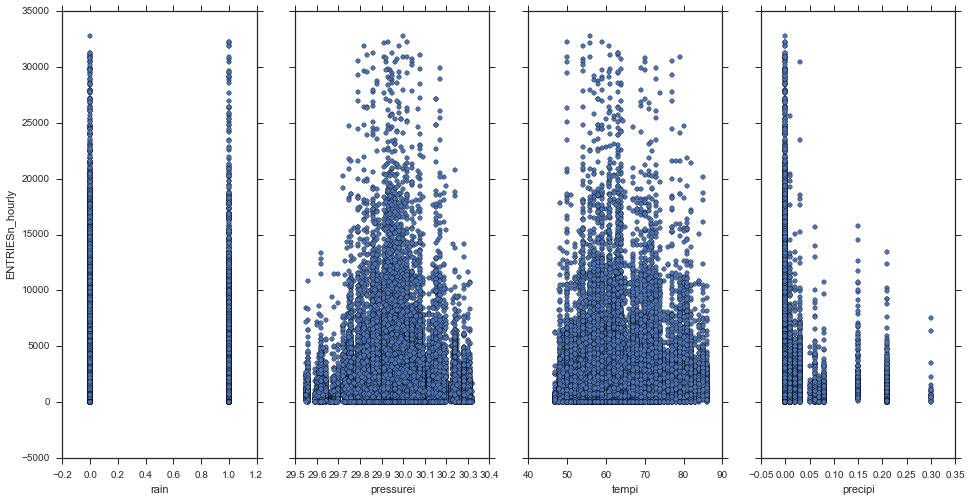

In [24]:
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='rain', y='ENTRIESn_hourly', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='pressurei', y='ENTRIESn_hourly', ax=axs[1])
df.plot(kind='scatter', x='tempi', y='ENTRIESn_hourly', ax=axs[2])
df.plot(kind='scatter', x='precipi', y='ENTRIESn_hourly', ax=axs[3])

In [29]:
df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon,ENTRIESn_hourly_logtran
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177,-inf
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177,-inf
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177,-inf
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177,-inf
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177,-inf


In [43]:
# Add UNIT to features using dummy variables
dummy_units = pd.get_dummies(df['UNIT'], prefix='dummy_unit')

In [53]:
# create X and y
feature_cols = ['rain','precipi', 'hour', 'meantempi', 'EXITSn_hourly']

X = df[feature_cols]
X = X.join(dummy_units)
#print X

y = df.ENTRIESn_hourly

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

825.561183078
[  9.82807798e+01  -1.53248195e+03   7.98746298e+01  -8.06730020e+00
   5.31969977e-01  -1.00868623e+03  -8.15756548e+02  -8.28832005e+02
  -7.41818535e+02  -9.34450824e+02  -9.23865655e+02  -9.59314238e+02
   4.83925209e+03   4.47293933e+03  -3.82957768e+02  -8.04852287e+02
   1.25234610e+03   3.21721635e+03   1.28654623e+03   2.03531932e+03
   1.43020887e+03   4.16577988e+03   3.56316564e+03   5.36497231e+02
   2.59061754e+03   3.14877292e+02   3.91249427e+03   4.14078980e+02
   1.29357178e+03  -1.09236081e+02   4.71307079e+03  -5.67865198e+02
   1.23533556e+03  -4.45077741e+02  -6.88072864e+02  -9.70488688e+02
  -3.97472148e+02  -7.79266889e+00   9.22817333e+02  -1.25092042e+03
   5.60039170e+02   1.54537311e+03   4.46511334e+03   2.56387102e+02
   1.03635320e+03   1.94678865e+03  -1.33860338e+02   1.34062689e+03
  -3.74851435e+02   3.85930322e+03  -2.79344578e+02   1.78912851e+03
  -7.31299090e+02  -2.35927919e+02  -7.10824926e+02  -8.20660048e+02
   6.19471095e+02  -

In [54]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('rain', 98.280779788978506),
 ('precipi', -1532.481950467833),
 ('hour', 79.87462979853521),
 ('meantempi', -8.0673002004715393),
 ('EXITSn_hourly', 0.53196997720833084)]

In [55]:
# calculate the R-squared
lm.score(X, y)

0.54462589076763068

In [78]:
# Add UNIT to features using dummy variables
dummy_units = pd.get_dummies(df['UNIT'], prefix='dummy_unit')
# create X and y
feature_cols = ['rain','precipi', 'hour', 'meantempi', 'EXITSn_hourly']

X = df[feature_cols]
X = X.join(dummy_units)
#print X

y = df.ENTRIESn_hourly


X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     207.8
Date:                Thu, 03 Dec 2015   Prob (F-statistic):               0.00
Time:                        14:51:44   Log-Likelihood:            -3.8452e+05
No. Observations:               42649   AIC:                         7.695e+05
Df Residuals:                   42404   BIC:                         7.717e+05
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             822.1356     96.640      8.507      0.000       632.719  1011.552
rain               98.2808     25.738      3.819      0.000        47.835   148.727
precipi         -1532.4819    400.848     -3.823      0.000     -2318.153  -746.811
hour               79.8746      1.479     53.997      0.000        76.975    82.774
meantempi          -8.0673      1.480     -5.450      0.000       -10.968    -5.166
EXITSn_hourly       0.5320      0.006     88.398      0.000         0.520     0.544
dummy_unit_R003 -1005.2607    153.987     -6.528      0.000     -1307.078  -703.443
dummy_unit_R004  -812.3310    150.826     -5.386      0.000     -1107.952  -516.710
dummy_unit_R005  -825.4064    152.132     -5.426      0.000     -1123.588  -527.225
dummy_unit_R006  -738.3930    148.721     -4.965      0.000     -1029.890  -446.896
dummy_unit_R007  -931.0253    153.042     -6.083      0.000     -1230.991  -631.060
dummy_unit_R008  -920.4401    153.488     -5.997      0.000     -1221.280  -619.600
dummy_unit_R009  -955.8887    150.863     -6.336      0.000     -1251.583  -660.195
dummy_unit_R011  4842.6777    147.219     32.894      0.000      4554.125  5131.230
dummy_unit_R012  4476.3649    148.720     30.099      0.000      4184.870  4767.859
dummy_unit_R013  -379.5322    146.801     -2.585      0.010      -667.265   -91.800
dummy_unit_R016  -801.4267    147.029     -5.451      0.000     -1089.606  -513.247
dummy_unit_R017  1255.7717    146.781      8.555      0.000       968.079  1543.464
dummy_unit_R018  3220.6419    149.854     21.492      0.000      2926.925  3514.359
dummy_unit_R019  1289.9718    146.227      8.822      0.000      1003.364  1576.580
dummy_unit_R020  2038.7449    148.990     13.684      0.000      1746.722  2330.768
dummy_unit_R021  1433.6344    147.928      9.691      0.000      1143.692  1723.577
dummy_unit_R022  4169.2054    151.611     27.499      0.000      3872.045  4466.366
dummy_unit_R023  3566.5912    146.483     24.348      0.000      3279.481  3853.702
dummy_unit_R024   539.9228    146.923      3.675      0.000       251.951   827.895
dummy_unit_R025  2594.0431    146.591     17.696      0.000      2306.722  2881.365
dummy_unit_R027   318.3029    146.528      2.172      0.030        31.105   605.501
dummy_unit_R029  3915.9198    147.209     26.601      0.000      3627.388  4204.452
dummy_unit_R030   417.5045    146.553      2.849      0.004       130.258   704.751
dummy_unit_R031  1296.9973    146.898      8.829      0.000      1009.075  1584.920
dummy_unit_R032  -105.8105    149.873     -0.706      0.480      -399.564   187.943
dummy_unit_R033  4716.4964    147.494     31.977      0.000      4427.404  5005.588
dummy_unit_R034  -564.4396    152.913     -3.691      0.000      -864.153  -264.727
dummy_unit_R035  1238.7611    147.030      8.425      0.000

In [80]:
results.rsquared

0.54462589076763024